In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
credit = pd.read_csv('Chase_cc.csv')
debit = pd.read_csv('Chase_debit.csv')

In [14]:
# drop columns that are not needed
credit = credit.drop(['Post Date', 'Memo'], axis=1)

In [41]:
credit.head()

,Transaction Date,Description,Category,Type,Amount
0,04/29/2022,ZSK*RZ RED 88 NOODLE P,Food & Drink,Sale,-22.38
1,04/30/2022,RAISING CANES 0552,Food & Drink,Sale,-25.85
2,04/28/2022,YARD HOUSE 0108373,Food & Drink,Sale,-37.82
3,04/28/2022,SPECTRUM,Bills & Utilities,Sale,-74.99
4,04/28/2022,YARD HOUSE 83700083733,Food & Drink,Sale,-38.92


In [16]:
credit['Type'].unique()

array(['Sale', 'Payment', 'Return', 'Adjustment'], dtype=object)

In [17]:
credit['Category'].unique()

array(['Food & Drink', 'Bills & Utilities', nan, 'Shopping',
       'Health & Wellness', 'Travel', 'Professional Services',
       'Groceries', 'Entertainment', 'Gas', 'Personal', 'Home',
       'Fees & Adjustments'], dtype=object)

In [67]:
# focus on analyzing credit card usage under "Sale" type
sale = credit.loc[credit.Type == 'Sale'].copy()

# convert negative values to positive in "Amount" column
sale['Amount'] = sale['Amount'].apply(lambda x: np.abs(x))

# convert date to datetime and changing columnn name
sale['Transaction Date'] = pd.to_datetime(sale['Transaction Date'])
sale = sale.rename(columns={'Transaction Date':'Date'})

sale.head()

,Date,Description,Category,Type,Amount
0,2022-04-29,ZSK*RZ RED 88 NOODLE P,Food & Drink,Sale,22.38
1,2022-04-30,RAISING CANES 0552,Food & Drink,Sale,25.85
2,2022-04-28,YARD HOUSE 0108373,Food & Drink,Sale,37.82
3,2022-04-28,SPECTRUM,Bills & Utilities,Sale,74.99
4,2022-04-28,YARD HOUSE 83700083733,Food & Drink,Sale,38.92


In [58]:
category_spend = sale[['Category', 'Amount']].groupby(['Category']).sum()
category_spend = category_spend.reset_index()

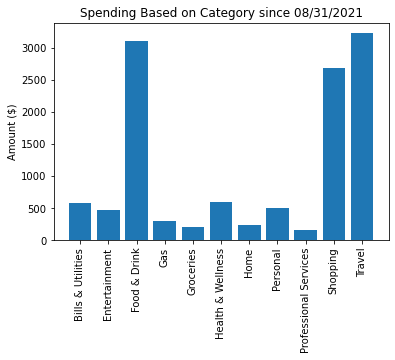

In [60]:
plt.bar(category_spend.Category, category_spend.Amount)
plt.xticks(rotation = 90)
plt.ylabel('Amount ($)')
plt.title('Spending Based on Category since 08/31/2021');

In [109]:
df2 = sale.copy()
df2['Date2'] = df2['Date'].dt.strftime('%m, %Y')
byMonth = df2[['Date2', 'Amount']].groupby(['Date2']).sum()
byMonth = byMonth.reset_index()
byMonth['Month'] = pd.to_datetime(byMonth['Date2']).dt.month
byMonth['Year'] = pd.to_datetime(byMonth['Date2']).dt.year
byMonth = byMonth.sort_values(['Year', 'Month']).drop(['Month', 'Year'], axis=1)
byMonth['Date2'] = pd.to_datetime(byMonth['Date2']).dt.strftime('%b, %Y')

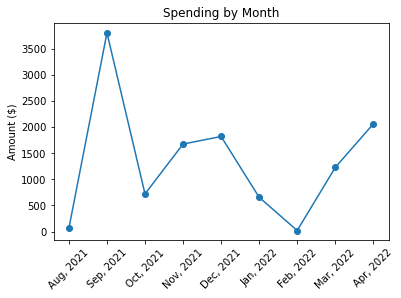

In [114]:
plt.plot(byMonth.Date2, byMonth.Amount, '-o')
plt.xticks(rotation=45)
plt.title('Spending by Month')
plt.ylabel('Amount ($)');

In [118]:
shopping = sale[sale['Category'] == 'Shopping'].copy()
df3 = shopping.groupby(['Date']).sum()
df3 = df3.reset_index()

food_drink = sale[sale['Category'] == 'Food & Drink'].copy()
df4 = food_drink.groupby(['Date']).sum()
df4 = df4.reset_index()

travel = sale[sale['Category'] == 'Travel'].copy()
df5 = travel.groupby(['Date']).sum()
df5 = df5.reset_index()

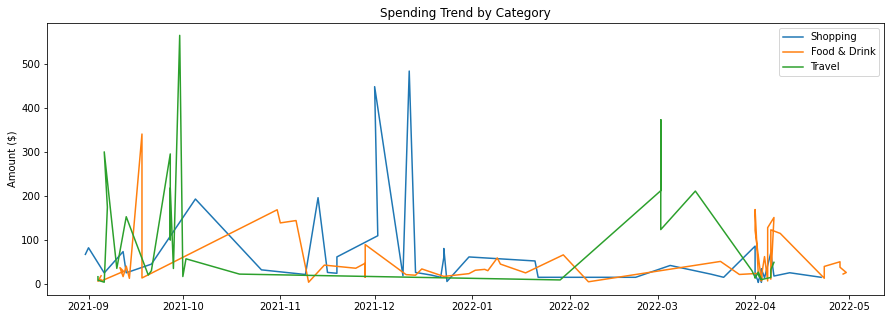

In [123]:
plt.figure(figsize=(15,5))
plt.plot(shopping.Date, shopping.Amount, label='Shopping')
plt.plot(food_drink.Date, food_drink.Amount, label='Food & Drink')
plt.plot(travel.Date, travel.Amount, label='Travel')
plt.ylabel('Amount ($)')
plt.title('Spending Trend by Category')
plt.legend();

In [144]:
# Pandas read the csv file incorrectly where the column names do not reflect their data
debit.head()

,Details,Posting Date,Description,Amount,Type,Balance,Check or Slip #
DEBIT,05/02/2022,ONLINE PAYMENT 14251527782 TO ALA 0909 05/02,-423.81,LOAN_PMT,,NaN,NaN
DEBIT,05/02/2022,ORIG CO NAME:VENMO CO ENTRY DESCR:P...,-20.69,ACH_DEBIT,,NaN,NaN
DEBIT,04/29/2022,Zelle payment to Leon Faynberg 14213115702,-748.00,QUICKPAY_DEBIT,8308.39,NaN,NaN
CREDIT,04/29/2022,VENMO CASHOUT PP...,633.39,ACH_CREDIT,9056.39,NaN,NaN
CREDIT,04/29/2022,INTERPUBLIC GROU DIR DEP PP...,1921.43,ACH_CREDIT,8423.00,NaN,NaN


In [180]:
debit_cleaned = debit.copy()
debit_cleaned = debit_cleaned.reset_index()
debit_cleaned = debit_cleaned.drop(['Check or Slip #'], axis=1)
new_cols = debit_cleaned.columns[1:] # get names of columns in correct order
debit_cleaned = debit_cleaned.drop(['Balance'], axis=1)
debit_cleaned.columns = new_cols
debit_cleaned['Posting Date'] = pd.to_datetime(debit_cleaned['Posting Date'])

# replace empty cells with NaN
debit_cleaned['Balance'] = debit_cleaned['Balance'].replace(' ', np.nan) 

# drop rows with missing balance values
debit_cleaned = debit_cleaned.dropna() 

debit_cleaned['Balance'] = pd.to_numeric(debit_cleaned['Balance'])
debit_cleaned

,Details,Posting Date,Description,Amount,Type,Balance
2,DEBIT,2022-04-29,Zelle payment to Leon Faynberg 14213115702,-748.00,QUICKPAY_DEBIT,8308.39
3,CREDIT,2022-04-29,VENMO CASHOUT PP...,633.39,ACH_CREDIT,9056.39
4,CREDIT,2022-04-29,INTERPUBLIC GROU DIR DEP PP...,1921.43,ACH_CREDIT,8423.00
5,DEBIT,2022-04-28,Zelle payment to Leon Faynberg 14213112628,-2000.00,QUICKPAY_DEBIT,6501.57
6,DEBIT,2022-04-28,VENMO PAYMENT 1019769459463 WE...,-54.00,ACH_DEBIT,8501.57
...,...,...,...,...,...,...
250,CREDIT,2021-09-15,OPT OUTSOURCING PAYROLL PP...,1562.67,ACH_CREDIT,5554.49
251,CREDIT,2021-09-13,VENMO CASHOUT PP...,221.00,ACH_CREDIT,3991.82
252,DEBIT,2021-09-07,CLAIREMONT AUTO SAN DIEGO CA 0...,-26.93,DEBIT_CARD,3770.82
253,DEBIT,2021-09-02,Online Payment 12508527745 To ALA 0909 09/02,-423.81,LOAN_PMT,3797.75


In [181]:
df6 = debit_cleaned[['Posting Date', 'Balance']].groupby(['Posting Date']).first().reset_index()
df6

,Posting Date,Balance
0,2021-09-02,3797.75
1,2021-09-07,3770.82
2,2021-09-13,3991.82
3,2021-09-15,5554.49
4,2021-09-20,5832.09
...,...,...
110,2022-04-25,8150.30
111,2022-04-26,7850.80
112,2022-04-27,7295.57
113,2022-04-28,6501.57


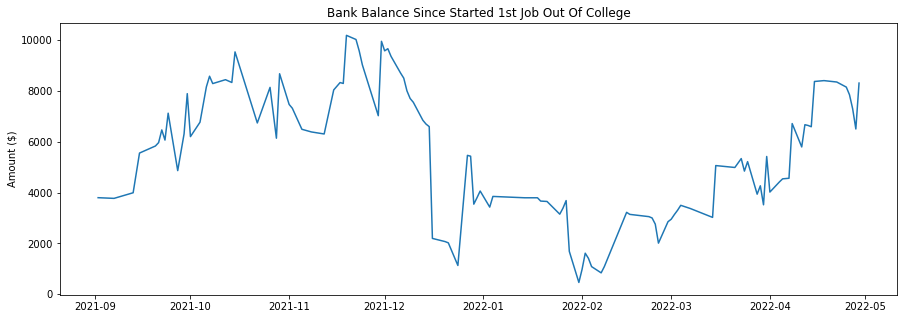

In [186]:
plt.figure(figsize=(15, 5))
plt.plot(df6['Posting Date'], df6.Balance)
plt.title('Bank Balance Since Started 1st Job Out Of College')
plt.ylabel('Amount ($)');

In [325]:
pattern1 = r'PAYROLL|INTERPUBLIC' # regex pattern for income from jobs 
pattern2 = r'Leon Faynberg|Payment|CITI' # regex pattern for rent, credit card/car payments
pattern3 = r'VENMO' # regex pattern for Venmo
pattern4 = r'Zelle payment from' # regex pattern for zelle payments received

income = debit_cleaned[debit_cleaned.Description.str.contains(pattern1)]
payment = debit_cleaned[debit_cleaned.Description.str.contains(pattern2)]
venmo = debit_cleaned[debit_cleaned.Description.str.contains(pattern3)]
zelle_received = debit_cleaned[debit_cleaned.Description.str.contains(pattern4)]

In [326]:
payment_total = payment[['Type', 'Amount']].groupby('Type').sum()
chase_payment = np.abs(payment_total.loc['ACCT_XFER'][0])
citi_payment = np.abs(payment_total.loc['ACH_DEBIT'][0])
rent = np.abs(payment_total.loc['QUICKPAY_DEBIT'][0])
car_payment = np.abs(payment_total.loc['LOAN_PMT'][0])

total_income = round(sum(income['Amount']), 2)

venmo_total = venmo[['Type', 'Amount']].groupby('Type').sum()
venmo_payment = np.abs(venmo_total.loc['ACH_DEBIT'][0] + venmo_total.loc['DEBIT_CARD'][0])
venmo_cashout = venmo_total.loc['ACH_CREDIT'][0]

zelle_rtotal = round(sum(zelle_received['Amount']), 2)

In [327]:
print('Income since graduating college: ${}'.format(total_income))
print('Amount paid for Chase credit card: ${}'.format(chase_payment))
print('Amount paid for Citi credit card: ${}'.format(citi_payment))
print('Amount paid for rent: ${}'.format(rent))
print('Amount paid for car loan: ${}'.format(car_payment))
print('Amount paid on Venmo: ${}'.format(venmo_payment))
print('Amount cashout on Venmo: ${}'.format(venmo_cashout))
print('Amount received on Zelle: ${}'.format(zelle_rtotal))

Income since graduating college: $26430.19
Amount paid for Chase credit card: $11609.66
Amount paid for Citi credit card: $8160.51
Amount paid for rent: $19144.4
Amount paid for car loan: $3390.48
Amount paid on Venmo: $3756.15
Amount cashout on Venmo: $17678.64
Amount received on Zelle: $8823.0


In [341]:
import datetime as dt

debit_cleaned['Date'] = debit_cleaned['Posting Date'].map(dt.datetime.toordinal)

In [352]:
one_hot = pd.get_dummies(debit_cleaned['Type'])
mdf = pd.concat([debit_cleaned, one_hot], axis=1)
mdf = mdf.drop(['Details', 'Description', 'Posting Date', 'Type'], axis=1)
mdf.columns

Index(['Amount', 'Balance', 'Date', 'ACCT_XFER', 'ACH_CREDIT', 'ACH_DEBIT',
       'ATM', 'CHASE_TO_PARTNERFI', 'CHECK_DEPOSIT', 'DEBIT_CARD',
       'FEE_TRANSACTION', 'LOAN_PMT', 'MISC_CREDIT', 'MISC_DEBIT',
       'PARTNERFI_TO_CHASE', 'QUICKPAY_CREDIT', 'QUICKPAY_DEBIT'],
      dtype='object')

In [370]:
money_out = ['ACCT_XFER', 'ACH_DEBIT', 'CHASE_TO_PARTNERFI', 'DEBIT_CARD', 'FEE_TRANSACTION', 'LOAN_PMT', 'MISC_DEBIT', 'QUICKPAY_DEBIT']
money_in = ['ATM', 'ACH_CREDIT', 'PARTNERFI_TO_CHASE', 'CHECK_DEPOSIT', 'MISC_CREDIT', 'QUICKPAY_CREDIT']

mdf2 = debit_cleaned.copy()
mdf2['Type One Hot'] = mdf2['Type'].apply(lambda x: 1 if x in money_in else 0)
mdf2

,Details,Posting Date,Description,Amount,Type,Balance,Date,Type One Hot
2,DEBIT,2022-04-29,Zelle payment to Leon Faynberg 14213115702,-748.00,QUICKPAY_DEBIT,8308.39,738274,0
3,CREDIT,2022-04-29,VENMO CASHOUT PP...,633.39,ACH_CREDIT,9056.39,738274,1
4,CREDIT,2022-04-29,INTERPUBLIC GROU DIR DEP PP...,1921.43,ACH_CREDIT,8423.00,738274,1
5,DEBIT,2022-04-28,Zelle payment to Leon Faynberg 14213112628,-2000.00,QUICKPAY_DEBIT,6501.57,738273,0
6,DEBIT,2022-04-28,VENMO PAYMENT 1019769459463 WE...,-54.00,ACH_DEBIT,8501.57,738273,0
...,...,...,...,...,...,...,...,...
250,CREDIT,2021-09-15,OPT OUTSOURCING PAYROLL PP...,1562.67,ACH_CREDIT,5554.49,738048,1
251,CREDIT,2021-09-13,VENMO CASHOUT PP...,221.00,ACH_CREDIT,3991.82,738046,1
252,DEBIT,2021-09-07,CLAIREMONT AUTO SAN DIEGO CA 0...,-26.93,DEBIT_CARD,3770.82,738040,0
253,DEBIT,2021-09-02,Online Payment 12508527745 To ALA 0909 09/02,-423.81,LOAN_PMT,3797.75,738035,0


In [353]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()
train, test = train_test_split(mdf, test_size=0.2, train_size=0.8, random_state=42)
print('Train: ', train.shape, 'Test: ', test.shape)

Train:  (202, 17) Test:  (51, 17)


In [393]:
def rmse(errors):
    return np.sqrt(np.mean(errors**2))

In [394]:
train_X = train[['Amount', 'Date', 'ACCT_XFER', 'ACH_CREDIT', 'ACH_DEBIT',
       'ATM', 'CHASE_TO_PARTNERFI', 'CHECK_DEPOSIT', 'DEBIT_CARD',
       'FEE_TRANSACTION', 'LOAN_PMT', 'MISC_CREDIT', 'MISC_DEBIT',
       'PARTNERFI_TO_CHASE', 'QUICKPAY_CREDIT', 'QUICKPAY_DEBIT']].to_numpy()
test_X = test[['Amount', 'Date', 'ACCT_XFER', 'ACH_CREDIT', 'ACH_DEBIT',
       'ATM', 'CHASE_TO_PARTNERFI', 'CHECK_DEPOSIT', 'DEBIT_CARD',
       'FEE_TRANSACTION', 'LOAN_PMT', 'MISC_CREDIT', 'MISC_DEBIT',
       'PARTNERFI_TO_CHASE', 'QUICKPAY_CREDIT', 'QUICKPAY_DEBIT']].to_numpy()
train_Y = train['Balance'].to_numpy()
test_Y = test['Balance'].to_numpy()

model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)
rmse = rmse(test_Y - pred_Y)
rmse

2681.7713564433566

In [395]:
model.score(train_X, train_Y)

0.27507578332404636

In [371]:
model2 = LinearRegression()
train2, test2 = train_test_split(mdf2, train_size=0.8, test_size=0.2, random_state=42)
print('Train: ', train2.shape, 'Test: ', test2.shape)

Train:  (202, 8) Test:  (51, 8)


In [382]:
train2_X = train2[['Amount', 'Date', 'Type One Hot']].to_numpy()
train2_Y = train2['Balance'].to_numpy()
test2_X = test2[['Amount', 'Date', 'Type One Hot']].to_numpy()
test2_Y = test2['Balance'].to_numpy()

model2.fit(train2_X, train2_Y)
pred2_Y = model2.predict(test2_X)
rmse2 = rmse(test2_Y - pred2_Y)
rmse2

2781.5044108832817

In [383]:
model2.score(train2_X, train2_Y)

0.20227114467160712

In [389]:
model3 = LinearRegression()
train3_X = train2['Amount'].values.reshape(-1,1)

model3.fit(train3_X, train2_Y)
model3.score(train3_X, train2_Y)

0.031141060023352818